<a href="https://colab.research.google.com/github/malraharsh/Image-Captioning/blob/master/Image_Captioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
https://towardsdatascience.com/image-captioning-with-keras-teaching-computers-to-describe-pictures-c88a46a311b8
https://github.com/hlamba28/Automatic-Image-Captioning/blob/master/Automatic%20Image%20Captioning.ipynb


'''

'\nhttps://towardsdatascience.com/image-captioning-with-keras-teaching-computers-to-describe-pictures-c88a46a311b8\nhttps://github.com/hlamba28/Automatic-Image-Captioning/blob/master/Automatic%20Image%20Captioning.ipynb\n\n\n'

In [2]:
import numpy as np
# from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
%%capture

!wget https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip
!wget https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip

!unzip Flickr8k_Dataset.zip

!mkdir textFiles
!unzip Flickr8k_text.zip -d /content/textFiles

!rm -r sample_data
!rm -r __MACOSX/

In [ ]:
# import glob

# for i in glob.glob('*.txt'):
#     !rm $i

In [ ]:
def load_file(filename):
    with open(filename, 'r') as file:
        text = file.read()
    return text

In [ ]:
doc = load_file('/content/textFiles/Flickr8k.token.txt')

In [ ]:
print(doc[:200])

In [ ]:
import os

In [ ]:
def load_descriptions(file):
    info = {}

    for line in file.split('\n'):
        if len(line) <= 1:
            continue
        
        img_id, img_descr = line.split('\t')
        
        if not os.path.isfile(path_img_data + img_id[:-2]): #removes images not present
            continue
        
        img_id = img_id.split('.')[0]

        if img_id not in info:
            info[img_id] = list()
        info[img_id].append(img_descr)

    return info

In [ ]:
descriptions = load_descriptions(doc)
list(descriptions.items())[:3]

In [ ]:
# n = 3
# i = 0

# fix, ax = plt.subplots(n, 1, figsize=(25, 25))
# # ax.flatten()

# for (img_filename, img_descr) in list(descriptions.items())[:n]:
#     img_file = plt.imread('/content/Flicker8k_Dataset/' + img_filename + '.jpg')
#     ax[i].imshow(img_file)
#     print(' /n'.join(img_descr))
#     i += 1

In [ ]:
# import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# print(stopwords.words('english'))

In [ ]:
import string

def clean_sentence(sent):
    words = sent.split()
    words = map(str.lower, words)
    words = [w for w in words if len(w) > 1]
    words = [w for w in words if w.isalpha()] 
    words = 'startseq' + ' '.join(words) + ' endseq'  
    return words

def clean_descriptions(file):
    table = str.maketrans('', '', string.punctuation) #intab, outtab, toremove string, outtab replace intab

    for key, desc_list in descriptions.items():
        for idx, desc in enumerate(desc_list):
            desc_list[idx] = clean_sentence(desc)

clean_descriptions(descriptions)

In [ ]:
descriptions['1001773457_577c3a7d70']

In [ ]:
list(descriptions.items())[:1]

In [ ]:
import json

json.dump(descriptions, open('descriptions.txt', 'w'))
# json.load(descriptions, open('descriptions.txt', 'r'))

In [ ]:
path_img_data = '/content/Flicker8k_Dataset/'
path_text = '/content/textFiles/'

In [ ]:
train_images_path = load_file('/content/textFiles/Flickr_8k.trainImages.txt')
test_images_path = load_file('/content/textFiles/Flickr_8k.testImages.txt')

In [ ]:
train_images_path[:100]

In [ ]:
def create_images_list(imgnames, source=path_img_data):
    images = list()

    for img in imgnames.split('\n'):
        images.append(img)

    return images

train_images = create_images_list(train_images_path)
test_images = create_images_list(test_images_path)

In [ ]:
from PIL import Image

img_shape = (299, 299)

def preprocess(img_path):
    img = image.load_img(img_path, target_size=img_shape)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

In [ ]:
import glob
import pickle 
from time import time
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector,\
                         Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import Bidirectional
from keras.layers.merge import add
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras import Input, layers
from keras import optimizers
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [ ]:
base_model = InceptionV3(weights='imagenet')

In [ ]:
# #!!!!!
# n_sample = 100
# train_images = train_images[:n_sample]
# test_images = test_images[:n_sample]

In [ ]:
modelv3 = Model(base_model.input, base_model.layers[-2].output)

In [ ]:
def encode(img_name):
    img = preprocess(path_img_data + img_name)
    encoded_img = modelv3.predict(img)
    encoded_img = np.squeeze(encoded_img)
    return encoded_img

    
encoded_images_dict = lambda paths: {imgpath: encode(imgpath) for imgpath in paths}

encoded_train_images = encoded_images_dict(train_images)
encoded_test_images = encoded_images_dict(test_images)  

In [ ]:
# train_images.index('1000268201_693b08cb0e.jpg')

In [ ]:
show3(encoded_train_images)

In [ ]:
train_images[0]

In [ ]:
preprocess(path_img_data+_).shape

In [ ]:
import os

dir_path = 'Pickle'
if not os.path.isdir(dir_path):
    os.mkdir(dir_path)

In [ ]:
def save_images_pkl(data, path):
    path = 'Pickle/' + path
    with open(path, 'wb') as file:
        pickle.dump(data, file)

def load_images_pkl(path): # not working
    with open(path, 'rb') as f:
        data = pickle.load(f)
    return data

save_images_pkl(encoded_train_images, 'encoded_train_images.pkl')
save_images_pkl(encoded_test_images, 'encoded_test_images.pkl')

In [ ]:
captions = np.reshape(list(descriptions.values()), -1) # 2D descr in flattened list of captions
len(captions)

In [ ]:
def show3(var):
    return list(var)[:3]

In [ ]:
words_count = {}
word_count_thresh = 10

for line in captions:
    for word in line.split(' '):
        words_count[word] = words_count.get(word, 0) + 1 # 0 if no word

vocab = [w for w, count in words_count.items() if count >= word_count_thresh]        

In [ ]:
print("Processed words from {} -> {}".format(len(words_count), len(vocab)))

In [ ]:
idx2word = {}
word2idx = {}

for idx, w in enumerate(vocab, 1):
    word2idx[w] = idx
    idx2word[idx] = w

In [ ]:
size_vocab = len(vocab) + 1 # for appended 0
size_vocab

In [ ]:
# def create_vocab(descr): # no use
#     vocab = set()

#     for d_list in descr.values():
#         [vocab.update(d.split()) for d in d_list]

#     return vocab

# vocabulary = create_vocab(descriptions)
# list(vocabulary)[:5]

In [ ]:
max_length_sent = max(map(lambda x: len(x.split()), captions))
max_length_sent

In [ ]:
def data_generator(batch_n_images, features):
    X1, X2, y = list(), list(), list()
    n = 0

    while True:
        for img, captions in descriptions.items():
            img = features.get(img + '.jpg')
            if img is None:
                continue
                
            n += 1

            for caption in captions: #caption is a sentence
                encoded_words = [word2idx[w] for w in caption.split()]

                for i in range(1, len(encoded_words)): #seq is sequence
                    in_seq, out_seq = encoded_words[:i], encoded_words[i]
                    in_seq = pad_sequences(in_seq, maxlen=max_length_sent)[0]
                    out_seq = to_categorical(out_seq, num_classes=size_vocab)[0] #create row = num of vocab
                    
                    X1.append(img)
                    X2.append(in_seq)
                    y.append(out_seq)


            if n == batch_n_images:
                yield [[np.array(X1), np.array(X2)], y]                
                X1, X2, y = list(), list(), list()
                n = 0




In [ ]:
%%capture
#https://www.floydhub.com/mhavelant/datasets/glove6b/1/glove.6B.200d.txt
!wget https://www.floydhub.com/api/v1/resources/Av2ThePYtAHXMAuSXEBV8X/glove.6B.200d.txt?content=true&rename=glove6b200dtxt #

# kaggle https://www.kaggle.com/incorpes/glove6b200d/download

In [ ]:
def loadGloveModel(path):
    embeddings = {}
    with open(path, encoding='utf-8') as file:
        for line in file:
            values = line.split()
            word = values[0]
            coefs = np.array(values[1:], dtype='float32')
            embeddings[word] = coefs
    print(len(embeddings), " words loaded")
    return embeddings

embeddings = loadGloveModel('/content/glove.6B.200d.txt?content=true')

In [ ]:
# embeddings['hello']

In [ ]:
embedding_dim = 200

embeddings_matrix = np.zeros((size_vocab, embedding_dim))

for idx, word in idx2word.items(): # mapping idx of word to vect of glove 
    embed_vect = embeddings.get(word)
    if embed_vect is not None:
        embeddings_matrix[idx] = embed_vect 

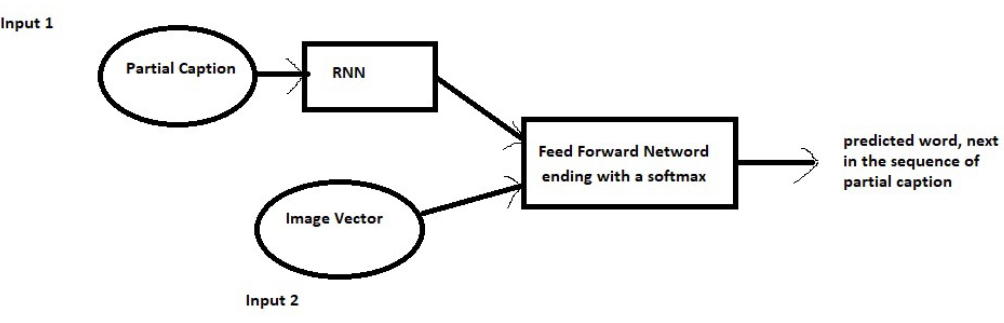

In [ ]:
shape_img_feature = (2048,)

#partial caption sequence
input_seq = Input(shape=(max_length_sent, ))
seq1 = Embedding(size_vocab, embedding_dim, mask_zero=True)(input_seq)
seq2 = Dropout(0.5)(seq1)
seq3 = LSTM(256)(seq2)

#image feature extractor
input_fe = Input(shape=shape_img_feature)
fe1 = Dropout(0.5)(input_fe)
fe2 = Dense(256, activation='relu')(fe1)

#decoding
decoder1 = add([fe2, seq3])
decoder2 = Dense(256, activation='relu')(decoder1)
output = Dense(size_vocab, activation='softmax')(decoder2)

model = Model(inputs=[input_fe, input_seq], outputs=output)

In [ ]:
model.summary()

model.layers[2]
model.layers[2].set_weights([embeddings_matrix])
model.layers[2].trainable = False
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
epochs = 5
batch_n_images = 5
steps = len(descriptions) // batch_n_images

In [ ]:
def data_generator(batch_n_images, features):
    X1, X2, y = list(), list(), list()
    n = 0

    while True:
        for img, captions in descriptions.items():
            img = features.get(img + '.jpg')
            if img is None:
                continue
                
            n += 1

            for caption in captions: #caption is a sentence
                encoded_words = [word2idx[w] for w in caption.split() if w in word2idx]

                for i in range(1, len(encoded_words)): #seq is sequence
                    in_seq, out_seq = encoded_words[:i], encoded_words[i]
                    in_seq = pad_sequences([in_seq], maxlen=max_length_sent)[0]
                    out_seq = to_categorical([out_seq], num_classes=size_vocab)[0] #create row = num of vocab
                    
                    X1.append(img)
                    X2.append(in_seq)
                    y.append(out_seq)


            if n == batch_n_images:
                yield [[np.array(X1), np.array(X2)], np.array(y)]                
                X1, X2, y = list(), list(), list()
                n = 0

In [ ]:

model.fit(data_generator(batch_n_images, encoded_train_images),
          steps_per_epoch=steps,
          epochs=epochs,
          verbose=1)